In [1]:
import numpy as np
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
#from time import clock
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
# from helpers import cluster_acc, myGMM,nn_arch,nn_reg
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import accuracy_score, homogeneity_score

In [38]:
from sklearn.datasets import load_breast_cancer, fetch_openml
data = load_breast_cancer()
cancer=pd.DataFrame(data['data'], columns=data.feature_names)
cancer['target']=data['target']

In [41]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
X = cancer.loc[:, cancer.columns != 'target']
y = cancer.loc[:, cancer.columns == 'target']

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)

In [7]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [8]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### K-Means

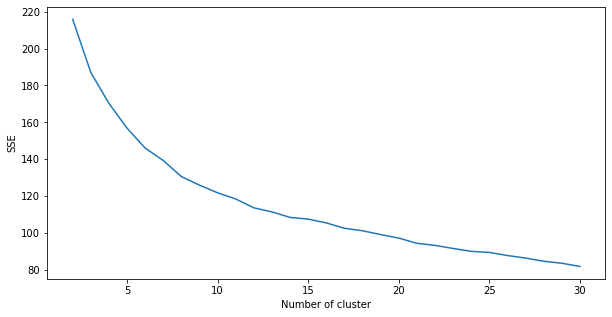

In [9]:
sse = {}
for cluster in list(range(2,31)):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=44).fit(X)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44).fit(X)
accuracy_score((1-kmeans.labels_), y)

0.9279437609841827

In [11]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44).fit(X)
adjusted_mutual_info_score((1-kmeans.labels_), y.values.reshape(569,))

0.6225724776699428

For n_clusters=2, The Silhouette Coefficient is 0.3845494883485513
For n_clusters=2, The homogeneity_score is 0.6114713227224743
For n_clusters=3, The Silhouette Coefficient is 0.33239324403592296
For n_clusters=3, The homogeneity_score is 0.5856481016988474
For n_clusters=4, The Silhouette Coefficient is 0.3134141570968232
For n_clusters=4, The homogeneity_score is 0.66143969409364
For n_clusters=5, The Silhouette Coefficient is 0.16540015346612186
For n_clusters=5, The homogeneity_score is 0.6833087828168695
For n_clusters=6, The Silhouette Coefficient is 0.15526723206294762
For n_clusters=6, The homogeneity_score is 0.6448238087826751
For n_clusters=7, The Silhouette Coefficient is 0.16007146724401336
For n_clusters=7, The homogeneity_score is 0.7137834504771275
For n_clusters=8, The Silhouette Coefficient is 0.15590537608612706
For n_clusters=8, The homogeneity_score is 0.730570327176693
For n_clusters=9, The Silhouette Coefficient is 0.15326932926920442
For n_clusters=9, The homog

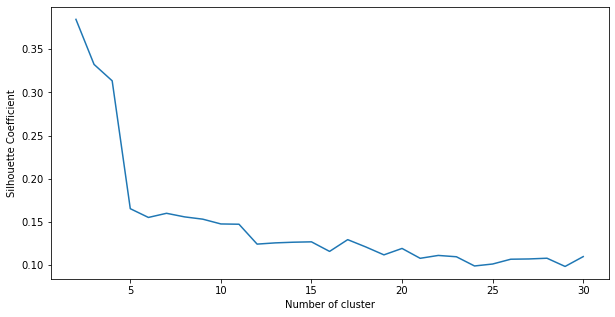

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silh = {}
homog = {}
for cluster in range(2, 31):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44).fit(X)
    label = kmeans.labels_
    #print(label)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y.values.reshape(569,), label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

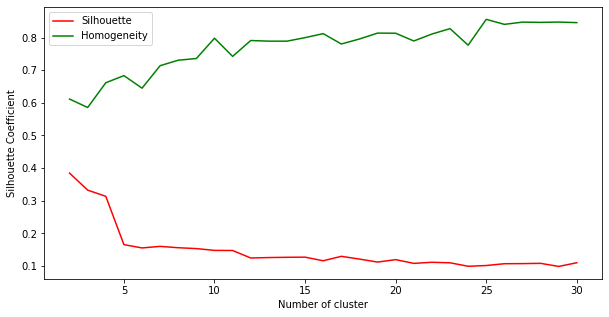

In [13]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

### Expectation Maximization

For n_clusters=2, The Silhouette Coefficient is 0.35613103888399694
For n_clusters=2, The homogeneity_score is 0.6684963776600906
For n_clusters=2, The log_likelihood score is 59.91078605573345
For n_clusters=3, The Silhouette Coefficient is 0.3109199307321668
For n_clusters=3, The homogeneity_score is 0.6669177184201946
For n_clusters=3, The log_likelihood score is 62.10483587835143
For n_clusters=4, The Silhouette Coefficient is 0.14248103106100338
For n_clusters=4, The homogeneity_score is 0.6210826277238797
For n_clusters=4, The log_likelihood score is 64.96731430378759
For n_clusters=5, The Silhouette Coefficient is 0.14703020049840249
For n_clusters=5, The homogeneity_score is 0.652567549074948
For n_clusters=5, The log_likelihood score is 66.56884788444793
For n_clusters=6, The Silhouette Coefficient is 0.13496066933923326
For n_clusters=6, The homogeneity_score is 0.6630621883146305
For n_clusters=6, The log_likelihood score is 67.75498630307531
For n_clusters=7, The Silhouette

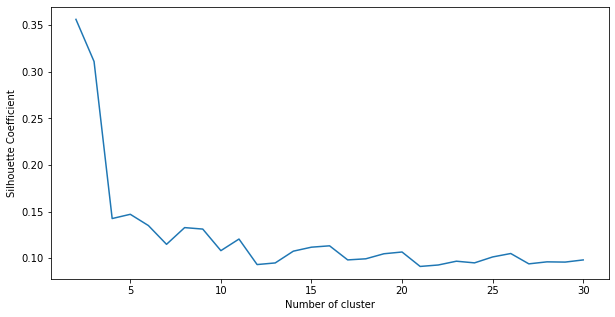

In [14]:
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in range(2, 31):
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(X)
    label = gmm.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y.values.reshape(569,), label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(X)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

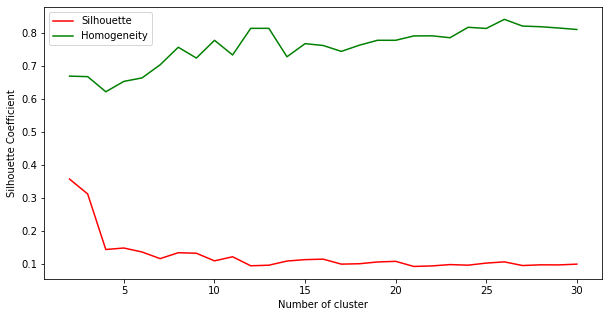

In [15]:
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

### PCA

In [16]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [17]:
X_df = pd.DataFrame(X, columns=cancer.columns[:-1])

In [19]:
explained_variance_ratio=[]
rc_err=[]
for dim in range(1,31):
    pca = PCA(n_components=dim, random_state=44)
    pca.fit_transform(X_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(X_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err.append(mean_squared_error(X_df.values, reconstructed))   
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

df=pd.DataFrame({'dim':range(1,31),'cumulative_explained_variance_ratio':explained_variance_ratio, 'rc_err':rc_err})
df

,dim,cumulative_explained_variance_ratio,rc_err
0,1,0.530977,0.076150
1,2,0.703812,0.072562
2,3,0.774956,0.071084
3,4,0.839069,0.069753
4,5,0.879930,0.068905
5,6,0.910644,0.068267
6,7,0.926453,0.067939
7,8,0.938368,0.067691
8,9,0.948252,0.067486
9,10,0.957706,0.067290


In [20]:
comp = 13
pca = PCA(n_components=comp, random_state=44)
pca_result = pca.fit_transform(X_df.values)
for i in range(comp):
    field_name = "pca-"+str(i)
    X_df[field_name] = pca_result[:,i]
    cancer[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
X_pca_4 = pca_result

Explained variation per principal component: [0.53097689 0.1728349  0.07114442 0.06411259 0.04086072 0.03071494
 0.01580837 0.01191472 0.00988429 0.00945446 0.00849397 0.00757976
 0.00656638]


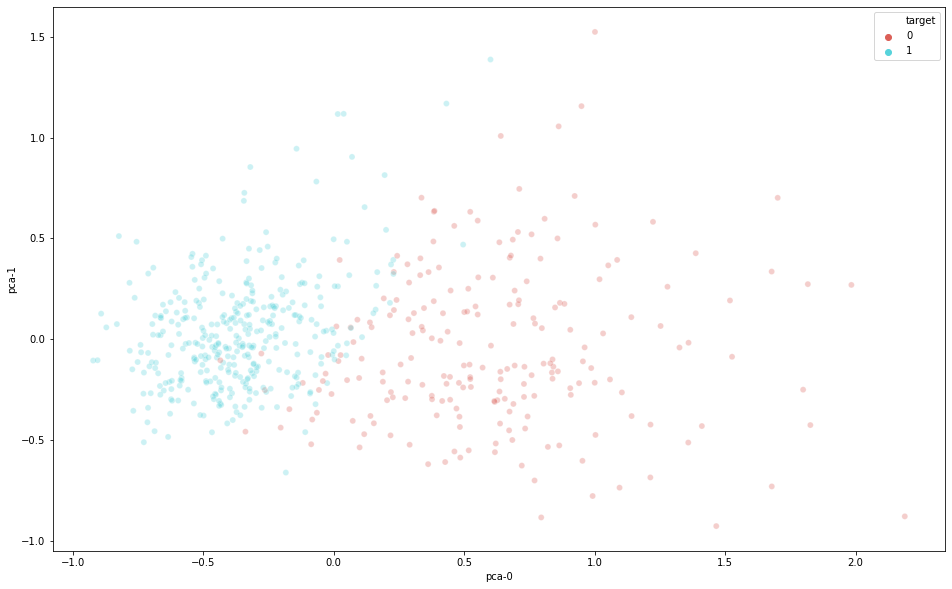

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=cancer,
    legend="full",
    alpha=0.3
)

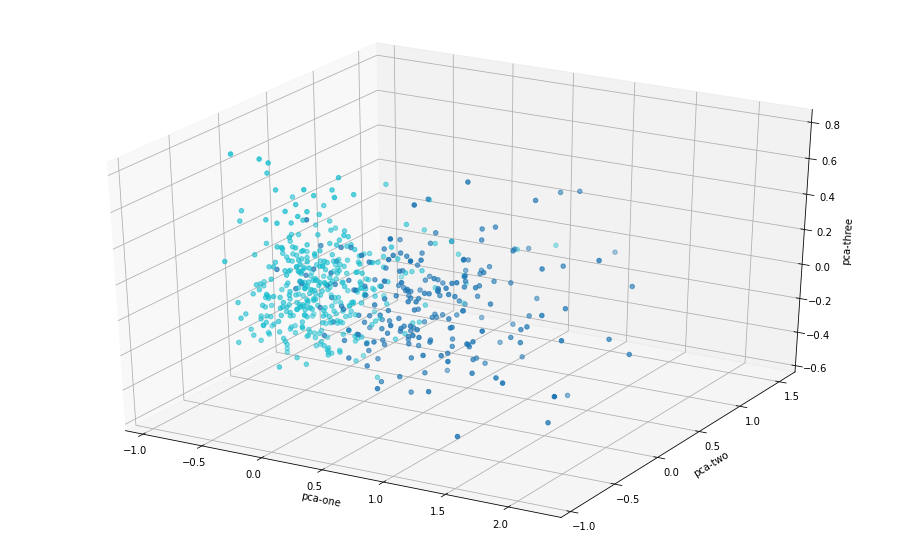

In [22]:
rndperm = np.random.permutation(cancer.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=cancer.iloc[rndperm,:]["pca-0"], 
    ys=cancer.iloc[rndperm,:]["pca-1"], 
    zs=cancer.iloc[rndperm,:]["pca-2"], 
    c=cancer.iloc[rndperm,:]["target"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### KPCA

In [24]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=30, random_state=44)
kpca.fit(X_df.values)
explained_variance_ratio = kpca.lambdas_ / np.sum(kpca.lambdas_)
#print(explained_variance_ratio)
explained_variance=[]
for i in range(1,31):
    explained_variance.append( np.sum(explained_variance_ratio[:i]))
    
df=pd.DataFrame({'component':range(1,31),'explained_variance':explained_variance})
df

,component,explained_variance
0,1,0.536246
1,2,0.710797
2,3,0.782647
3,4,0.847396
4,5,0.888662
5,6,0.919682
6,7,0.935647
7,8,0.947680
8,9,0.957663
9,10,0.967211


### ICA

In [25]:
from sklearn.datasets import load_breast_cancer, fetch_openml
data = load_breast_cancer()
cancer=pd.DataFrame(data['data'])
cancer['target']=data['target']

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


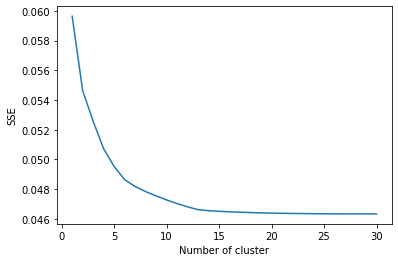

In [26]:
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
rc_errors = {}
for dim in range(1,31):
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(X_df.values)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
comp = 4
ica = FastICA(n_components=comp, random_state=44, max_iter=1000)
ica_result = ica.fit_transform(X_df.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    X_df[field_name] = ica_result[:,i]
    cancer[field_name] = ica_result[:,i]
X_ica_4 = ica_result
X_ica_4

array([[ 0.00610247,  0.13302326,  0.0582247 ,  0.06176748],
       [ 0.06391542,  0.03028149, -0.04384801,  0.03200928],
       [ 0.02781894,  0.0387802 ,  0.0072717 ,  0.05979094],
       ...,
       [ 0.01297093, -0.06356664, -0.01464122,  0.03389599],
       [-0.04927409, -0.01503061,  0.03765052,  0.13145995],
       [-0.0101717 , -0.09044009, -0.0083844 , -0.04685088]])

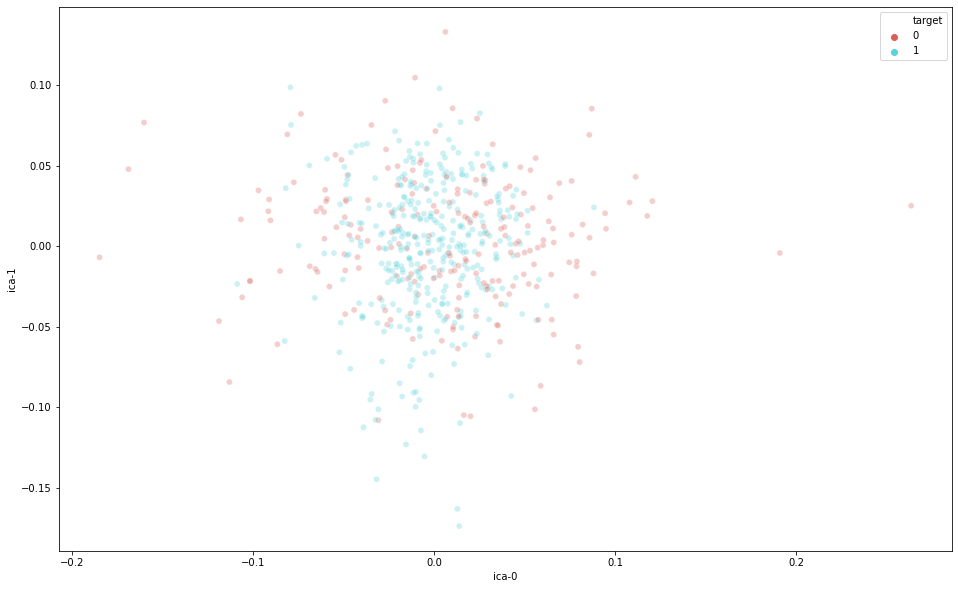

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=cancer,
    legend="full",
    alpha=0.3
)

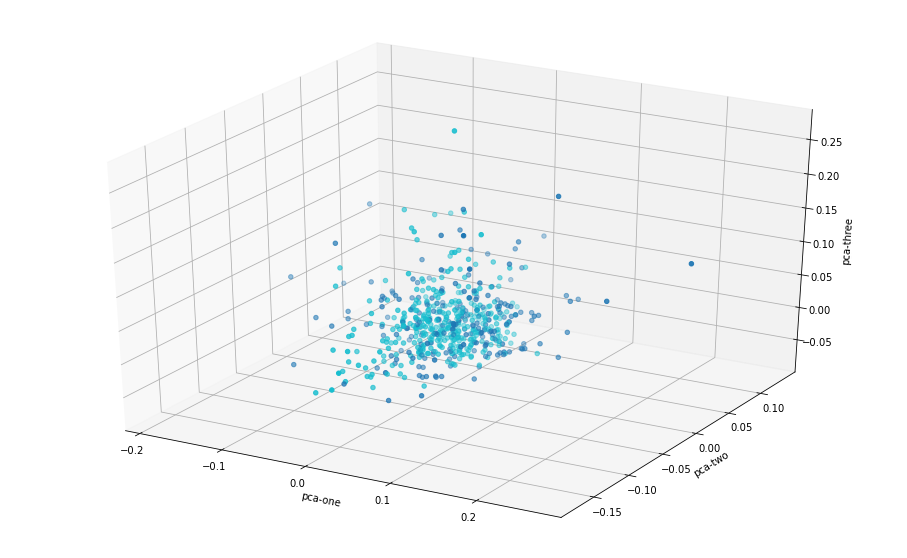

In [29]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=cancer.iloc[rndperm,:]["ica-0"], 
    ys=cancer.iloc[rndperm,:]["ica-1"], 
    zs=cancer.iloc[rndperm,:]["ica-2"], 
    c=cancer.iloc[rndperm,:]["target"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### Randomized Projection

In [31]:
from sklearn.datasets import load_breast_cancer, fetch_openml
data = load_breast_cancer()
cancer=pd.DataFrame(data['data'])
cancer['target']=data['target']

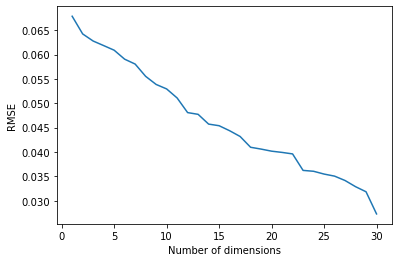

In [32]:
from sklearn.random_projection import GaussianRandomProjection
rc_errors = {}
for dim in range(1,31):
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(X_df.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.show()

In [34]:
comp = 15
grp = GaussianRandomProjection(n_components=comp, random_state=44)
grp_result = grp.fit_transform(X_df.values)
for i in range(comp):
    field_name = "grp-"+str(i)
    X_df[field_name] = grp_result[:,i]
    cancer[field_name] = grp_result[:,i]
X_grp_15 = grp_result

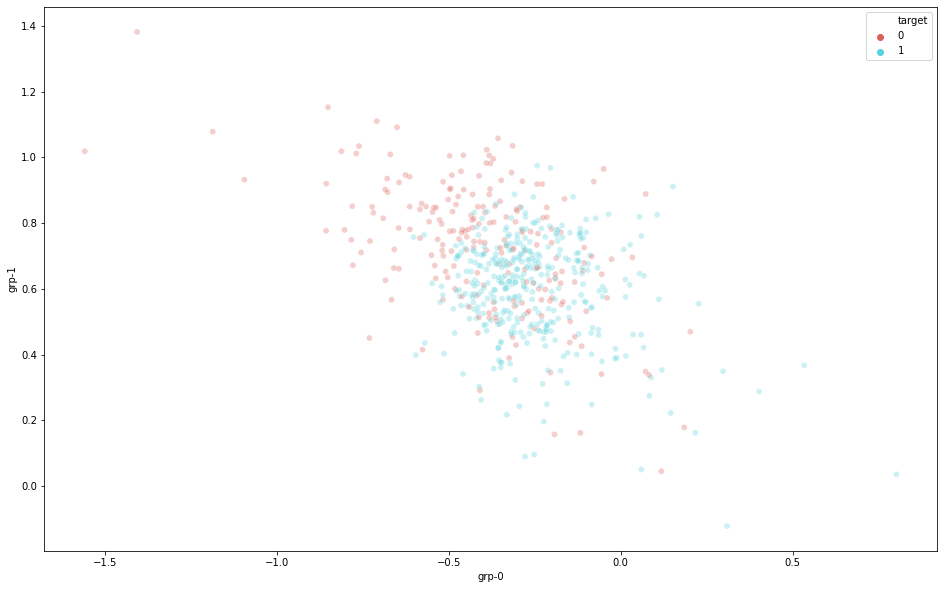

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="grp-0", y="grp-1",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=cancer,
    legend="full",
    alpha=0.3
)

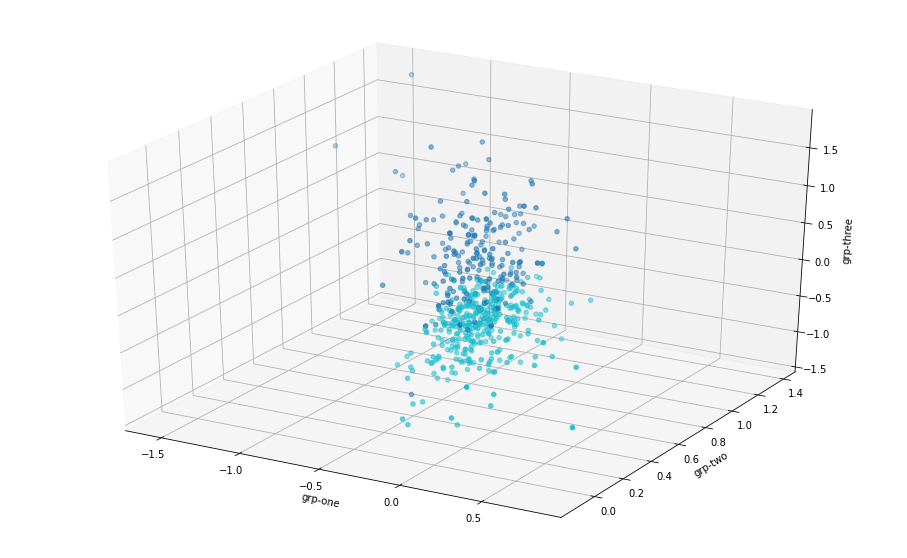

In [36]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=cancer.loc[rndperm,:]["grp-0"], 
    ys=cancer.loc[rndperm,:]["grp-1"], 
    zs=cancer.loc[rndperm,:]["grp-2"], 
    c=cancer.loc[rndperm,:]["target"], 
    cmap='tab10'
)
ax.set_xlabel('grp-one')
ax.set_ylabel('grp-two')
ax.set_zlabel('grp-three')
plt.show()